<a href="https://colab.research.google.com/github/MukherjeeSangita/ml_project/blob/master/EcommerceDataSetClassificationFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a supervised Natural Language Processing based classification problem.Here two algorothms had been implemented Naive Bayes Multinomial and Xe-boost Boosting algoriithm.Naive Bayes gives us 95% accuracy and XeBoost gives 86% accuracy to our test data.

Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing dataset
df=pd.read_csv("/content/ecommerceDataset.csv")

In [4]:
#coulmn names
cols=['Category','Description']

In [5]:
df.columns=cols



```
Exploratory Data Analysis
```



In [6]:
df.head()

,Category,Description
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [7]:
df.tail()

,Category,Description
50419,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50420,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50421,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50422,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."
50423,Electronics,Micromax Canvas Win W121 (White)


In [8]:
df.shape

(50424, 2)

In [9]:
#checking for the null Values
df.isnull().sum()

Category       0
Description    1
dtype: int64

In [10]:
df['Category'].value_counts()

Household                 19312
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: Category, dtype: int64

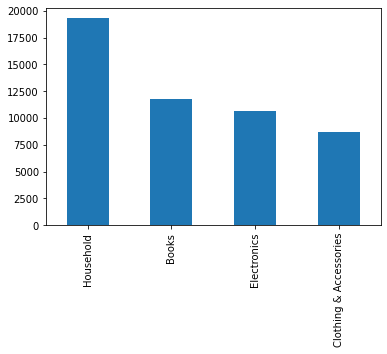

In [11]:
df['Category'].value_counts().plot(kind='bar')

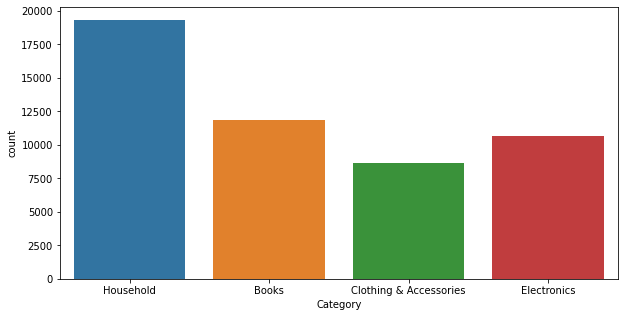

In [12]:
#using seaborn
plt.figure(figsize=(10,5))
sns.countplot(x='Category',data=df)
plt.show()

Data Preprocessing

In [13]:
#removing null values
df.dropna(inplace=True)

Data Cleaning

In [14]:
pip install neattext


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 5.1 MB/s 


In [15]:
#converting text to lower_case
df['Description']=df['Description'].str.lower()

In [16]:
import neattext.functions as nfx
#Removing User_Handles and storing it in a new column named as Description_clr
df['Description_clr']=df['Description'].apply(nfx.remove_userhandles)

In [17]:
#removing Stopwords
df['Description_clr']=df['Description_clr'].apply(nfx.remove_stopwords)

In [18]:
#Removing Puntuations
df['Description_clr']=df['Description_clr'].apply(nfx.remove_punctuations)

In [19]:
#Removing Numbers
df['Description_clr']=df['Description_clr'].apply(nfx.remove_numbers)

In [20]:
#Removing Special Character
df['Description_clr']=df['Description_clr'].apply(nfx.remove_special_characters)


In [21]:
df['Description_clr']

0        saf floral framed painting wood  inch x  inch ...
1        saf uv textured modern art print framed painti...
2        saf flower print framed painting synthetic  in...
3        incredible gifts india wooden happy birthday u...
4        pitaara box romantic venice canvas painting mm...
                               ...                        
50419    strontium microsd class  gb memory card black ...
50420    crossbeats wave waterproof bluetooth wireless ...
50421    karbonn titanium wind w white karbonn titanium...
50422    samsung guru fm plus smbed black colourblack c...
50423                          micromax canvas win w white
Name: Description_clr, Length: 50423, dtype: object

In [22]:
df['Description_clr']

0        saf floral framed painting wood  inch x  inch ...
1        saf uv textured modern art print framed painti...
2        saf flower print framed painting synthetic  in...
3        incredible gifts india wooden happy birthday u...
4        pitaara box romantic venice canvas painting mm...
                               ...                        
50419    strontium microsd class  gb memory card black ...
50420    crossbeats wave waterproof bluetooth wireless ...
50421    karbonn titanium wind w white karbonn titanium...
50422    samsung guru fm plus smbed black colourblack c...
50423                          micromax canvas win w white
Name: Description_clr, Length: 50423, dtype: object

Key Word Extraction

In [23]:
from collections import Counter

In [24]:
def extract_keywords(text,num=50):
  token=[tok for tok in text.split()]
  most_comon_tokens=Counter(token).most_common(num)
  return dict(most_comon_tokens)

In [25]:
df['Description_clr'].apply(extract_keywords)

0        {'special': 3, 'painting': 2, 'inch': 2, 'uv':...
1        {'painting': 8, 'cm': 6, 'frame': 5, 'x': 4, '...
2        {'painting': 7, 'frame': 4, 'x': 3, 'cm': 3, '...
3        {'wooden': 4, 'sizes': 3, 'engraved': 3, 'gift...
4        {'canvas': 5, 'x': 5, 'inch': 4, 'cms': 4, 'ar...
                               ...                        
50419    {'storage': 4, 'strontium': 3, 'gb': 3, 'memor...
50420    {'crossbeats': 1, 'wave': 1, 'waterproof': 1, ...
50421    {'karbonn': 4, 'titanium': 4, 'wind': 4, 'w': ...
50422    {'phone': 11, 'guru': 9, 'samsung': 8, 'fm': 8...
50423    {'micromax': 1, 'canvas': 1, 'win': 1, 'w': 1,...
Name: Description_clr, Length: 50423, dtype: object

In [26]:
#list of category
emotion_list=df["Category"].unique().tolist()
emotion_list

['Household', 'Books', 'Clothing & Accessories', 'Electronics']

Feature Engineering

In [27]:
#Build features 
X_feature=df["Description_clr"]
y_labels=df["Category"]
X_feature

0        saf floral framed painting wood  inch x  inch ...
1        saf uv textured modern art print framed painti...
2        saf flower print framed painting synthetic  in...
3        incredible gifts india wooden happy birthday u...
4        pitaara box romantic venice canvas painting mm...
                               ...                        
50419    strontium microsd class  gb memory card black ...
50420    crossbeats wave waterproof bluetooth wireless ...
50421    karbonn titanium wind w white karbonn titanium...
50422    samsung guru fm plus smbed black colourblack c...
50423                          micromax canvas win w white
Name: Description_clr, Length: 50423, dtype: object

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
#vectorizer
cv=CountVectorizer()
X=cv.fit_transform(X_feature)

In [29]:
#Get features by Name
cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aaa',
 'aaaaa',
 'aaabattery',
 'aaas',
 'aaatype',
 'aaausers',
 'aab',
 'aac',
 'aacapeflacmpoggrmwma',
 'aachen',
 'aacmpwavamr',
 'aacup',
 'aadhaar',
 'aadhar',
 'aadhunik',
 'aadhya',
 'aadi',
 'aadinath',
 'aadit',
 'aadjustable',
 'aadmis',
 'aadmora',
 'aadvay',
 'aafiya',
 'aafjesvan',
 'aafm',
 'aai',
 'aaiffel',
 'aaina',
 'aaj',
 'aakansha',
 'aakash',
 'aakrithi',
 'aal',
 'aaleezah',
 'aalim',
 'aam',
 'aamazing',
 'aamchur',
 'aamer',
 'aameria',
 'aamilne',
 'aamras',
 'aan',
 'aandhi',
 'aandwiches',
 'aaneither',
 'aani',
 'aania',
 'aanya',
 'aanyacentric',
 'aao',
 'aaraaar',
 'aaram',
 'aarathi',
 'aarav',
 'aarbee',
 'aarfa',
 'aari',
 'aarika',
 'aarka',
 'aarohi',
 'aaron',
 'aaronjeannettes',
 'aaronovitch',
 'aaroora',
 'aarsun',
 'aart',
 'aarti',
 'aas',
 'aasa',
 'aashi',
 'aashiqui',
 'aashirvaad',
 'aashirya',
 'aashto',
 'aashu',
 'aasize',
 'aasnas',
 'aassembly',
 'aata',
 'aati',
 'aattractive',
 'aatu',
 'aaup',
 'aaux',
 'aavante',
 'aavcl

In [30]:
#Transformers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [31]:
#splitting the dataset
#Here we have split the data into 70-30 into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y_labels,test_size=0.3,random_state=42)

Model training

In [32]:
# Load ml packages
# Estimators
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [33]:
#model_training_Naive_Bayes
nv_model=MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [34]:
nv_model.score(X_test,y_test)

0.9512130627355061

In [35]:
y_pred_for_nv=nv_model.predict(X_test)

In [39]:
#xe_boost_model_traing
xe_model=XGBClassifier()
xe_model.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [40]:
#accurancy for xe_boost
xe_model.score(X_test,y_test)

0.8673233291465592

In [41]:
y_pred_for_xe=xe_model.predict(X_test)

Making predictions

In [42]:
sample_text=["3.5 to usb type-c converter"]
#vectorizing 
vact=cv.transform(sample_text).toarray()

In [43]:
sample_tex2=["Dongel"]
#vectorizing 
vact2=cv.transform(sample_text).toarray()

In [44]:
#prediction for Naive_Bayes
nv_model.predict(vact)

array(['Electronics'], dtype='<U22')

In [45]:
nv_model.predict(vact2)

array(['Electronics'], dtype='<U22')

In [48]:
#prediction for Xe_Boost
xe_model.predict(vact)

array(['Electronics'], dtype=object)

In [49]:
xe_model.predict(vact2)

array(['Electronics'], dtype=object)

Model Evaluation


In [50]:
#classification Report for Naive_Bayes
print(classification_report(y_test,y_pred_for_nv))

                        precision    recall  f1-score   support

                 Books       0.97      0.92      0.95      3483
Clothing & Accessories       0.95      0.98      0.97      2618
           Electronics       0.95      0.93      0.94      3178
             Household       0.94      0.96      0.95      5848

              accuracy                           0.95     15127
             macro avg       0.95      0.95      0.95     15127
          weighted avg       0.95      0.95      0.95     15127



In [51]:
#Naive Bayes
confusion_matrix(y_test,y_pred_for_nv)

array([[3219,   54,   46,  164],
       [   4, 2574,   10,   30],
       [  56,   14, 2960,  148],
       [  41,   60,  111, 5636]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


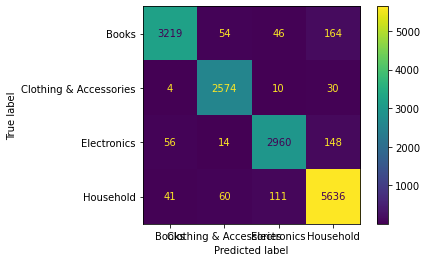

In [52]:
#plot confusion matrix for Naive Bayes
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nv_model,X_test,y_test)

In [ ]:
#Logistic Regression
confusion_matrix(y_test,y_pred_for_lr)

array([[3414,    6,   19,   44],
       [  13, 2565,    6,   34],
       [  48,    7, 3055,   68],
       [  56,   25,   47, 5720]])

In [ ]:
#classification Report for XEBoost
print(classification_report(y_test,y_pred_for_xe))

                        precision    recall  f1-score   support

                 Books       0.96      0.76      0.85      3483
Clothing & Accessories       0.95      0.91      0.93      2618
           Electronics       0.96      0.78      0.86      3178
             Household       0.77      0.96      0.86      5848

              accuracy                           0.87     15127
             macro avg       0.91      0.85      0.87     15127
          weighted avg       0.89      0.87      0.87     15127



In [ ]:
#XEBoost
confusion_matrix(y_test,y_pred_for_xe)

array([[2633,   26,   18,  806],
       [   5, 2372,   12,  229],
       [  53,   15, 2482,  628],
       [  45,   84,   86, 5633]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


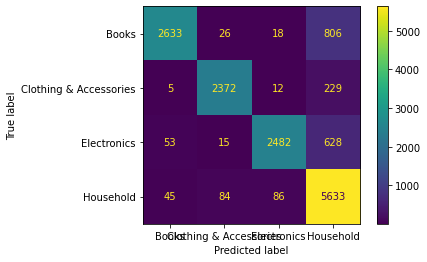

In [ ]:
#plot confusion matrix fot XEBoost
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xe_model,X_test,y_test)